In [78]:
# System imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets
from string import digits
import csv
import json
import numpy as np

pn.extension()

%matplotlib inline

In [113]:
# Local imports
import sys
sys.path.append("../lib2")


from Constants import Constants
from ProcessingTools import DateProcessingTools
from PreprocessingTools import CustomerNameCleaningFunctions
from PreprocessingTools import DateCleaningFunctions
from PreprocessingTools import SpecializedDateCleaningFunctions
from PreprocessingTools import DurationParsing
from PreprocessingTools import MappingFunctions


In [114]:
# Build tools
debug_level = 0
constants = Constants()
tool_customer = CustomerNameCleaningFunctions(debug_level)
tool_date = DateCleaningFunctions(debug_level)
tool_special_date = SpecializedDateCleaningFunctions(debug_level)
tool_duration_parsing = DurationParsing(debug_level)
tool_lookup_tables = MappingFunctions(debug_level)


In [82]:
# Import all preprocessed data
atlas           = pd.read_pickle(constants.PREPROCESSED_ATLAS_FILE_PATH)
forecast        = pd.read_pickle(constants.PREPROCESSED_FORECAST_DATA_FILE_PATH)
revenue2020     = pd.read_pickle(constants.PREPROCESSED_REVENUE2020_FILE_PATH)
revenue2020A    = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_FILE_PATH)
atlas2          = pd.read_pickle(constants.PREPROCESSED_ATLAS_2_FILE_PATH)


In [92]:
# Group by year and . and then create a new dataframe of the mean values
atlas2.head()
avg_price_df = atlas2.reset_index().groupby(by=['Subscription', 'Customers']).mean()
avg_price_df.head()

Number of Users  Invoice Amount        Lat  \
Subscription Customers                                                    
1 Year       University 1                NaN    69500.000000  30.460082   
             University 10             250.0     2166.670000  39.732210   
             University 101              NaN      750.000000  48.630369   
             University 102            350.0     4833.333333        NaN   
             University 103            100.0      750.000000  45.408173   

                                   Long  
Subscription Customers                   
1 Year       University 1    -91.188566  
             University 10   -90.246947  
             University 101  -97.471056  
             University 102         NaN  
             University 103 -122.922323

In [93]:
avg_price_df.dtypes

Number of Users    float64
Invoice Amount     float64
Lat                float64
Long               float64
dtype: object

In [120]:
# Use hvplot to create an interactive line chart of the average price ....
# The plot should have a dropdown selector for the neighborhood

avg_price_mean = avg_price_df

sfo_grouped_month_and_02_Anonymized_plot = avg_price_mean.hvplot.line(
    x='Customers',
    y='Invoice Amount',
    xlabel= 'Customers',
    ylabel='Invoice Amount',
    groupby='Subscription', 
    width=600
).opts(yformatter='%0f')

sfo_grouped_month_and_02_Anonymized_plot

:DynamicMap   [Subscription]
   :Curve   [Customers]   (Invoice Amount)

In [99]:
historical_data = atlas2.reset_index().set_index("Service Start").sort_index(ascending=True)

historical_data_invoice_amount = historical_data.groupby("Service Start").sum()["Invoice Amount"]
historical_data_invoice_count = historical_data.groupby("Service Start").count()["Invoice Amount"]

# Critical
historical_data_invoice_amount_cumulative = historical_data_invoice_amount.cumsum()
historical_data_invoice_count_cumulative = historical_data_invoice_count.cumsum()

# Extra
historical_data_invoice_mean = historical_data.groupby("Service Start").mean()["Invoice Amount"]
historical_data_nbr_users = historical_data.groupby("Service Start").sum()["Number of Users"]
historical_data_nbr_customers = historical_data.groupby("Service Start").count()["Customers"]

historical_data_nbr_users_cumulative = historical_data_nbr_users.cumsum()
historical_data_nbr_customers_cumulative = historical_data_nbr_customers.cumsum()

# historical_data_invoice_amount_cumulative.head()

Service Start
2015-03-18 00:00:00-04:00     72000.0
2015-06-01 00:00:00-04:00     82000.0
2015-06-10 00:00:00-04:00     85500.0
2015-09-18 00:00:00-04:00    129700.0
2015-10-01 00:00:00-04:00    133100.0
Name: Invoice Amount, dtype: float64

In [101]:

# Options
data_selector_list = [
    "Invoice Amount", "Invoice Count",
    "Cumulative Invoice Amount", "Cumulative Invoice Count",
    "Invoice Mean", "Number of Users", "Number of Customers",
    "Cumulative Number of Users", "Cumulative Number of Customers",
]
def generate_plot(
    data_selector,
    chosen_type_list,
    filter_by_year
    ):
    
    # Choose data to plot.
    df = None
    if data_selector == "Invoice Amount":
        df = historical_data_invoice_amount
    if data_selector == "Invoice Count":
        df = historical_data_invoice_count
    if data_selector == "Cumulative Invoice Amount":
        df = historical_data_invoice_amount_cumulative
    if data_selector == "Cumulative Invoice Count":
        df = historical_data_invoice_count_cumulative
    if data_selector == "Invoice Mean":
        df = historical_data_invoice_mean
    if data_selector == "Number of Users":
        df = historical_data_nbr_users
    if data_selector == "Number of Customers":
        df = historical_data_nbr_customers
    if data_selector == "Cumulative Number of Users":
        df = historical_data_nbr_users_cumulative
    if data_selector == "Cumulative Number of Customers":
        df = historical_data_nbr_customers_cumulative

        
    # Extract y/m/q for service start
    df_ymq = tool_data_processing.extract_and_append_year_month_quarter(df.reset_index(), "Service Start")

    # Filter by year
    df_filtered_by_year = df_ymq[ df_ymq["Year"] == filter_by_year ]
#     df_selected = df[ df['status'].isin(chosen_type_list) ]
    
    # Generate plot
    the_plot = df_filtered_by_year.hvplot.line(
        
    )
    
    return the_plot



# Display the interactive plot
# pn.interact(plot_heatmap, chosen_type=types)
# pn.interact(plot_heatmap, chosen_type_list=pn.widgets.CheckButtonGroup(name='Check Button Group', value=['confirmed', 'bedridden'], options=['confirmed', 'bedridden', 'recovered']))

generate_plot(
    "Invoice Amount",
    [],
    2020
    )


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [102]:
# Group by year and atlas and then create a new dataframe of the mean values
atlas.head()
avg_price_df = atlas.reset_index().groupby(by=['Customers','Subscription']).mean()
avg_price_df.head()

Invoice Amount
Customers      Subscription                
University 1   1 Year              69500.00
University 10  1 Year               2166.67
               3 Years              2350.00
University 100 1 Year               1500.00
               3 Years              5460.00

In [103]:
avg_price_df.dtypes

Invoice Amount    float64
dtype: object

In [ ]:
# Read the census data into a Pandas DataFrame
#file_path = Path("../Resources/sfo_atla.csv")
#sfo_data = pd.read_csv(file_path, index_col="year")
#sfo_data.head()

In [106]:
# Getting the data from the top 10 highest customers
#sfo(subscription, invoice)

customers = avg_price_df.groupby(["Invoice Amount", "Customers"]).max()
top_10_highest_customer = customers.sort_values(by='Invoice Amount', ascending=False).head(10)
top_10_highest_customer = top_10_highest_customer.reset_index()
top_10_highest_customer


,Invoice Amount,Customers
0,69500.0,University 1
1,50000.0,University 99
2,50000.0,University 70
3,50000.0,University 45
4,50000.0,University 138
5,50000.0,University 107
6,30000.0,University 162
7,26750.0,University 29
8,26250.0,University 88
9,26250.0,University 421


In [107]:
top_10_highest_customer_plot = top_10_highest_customer.hvplot.bar(
    x='Customers',
    y='Invoice Amount',
    rot=90,
title='Top 10 Highest Customers')
top_10_highest_customer_plot

:Bars   [Customers]   (Invoice Amount)

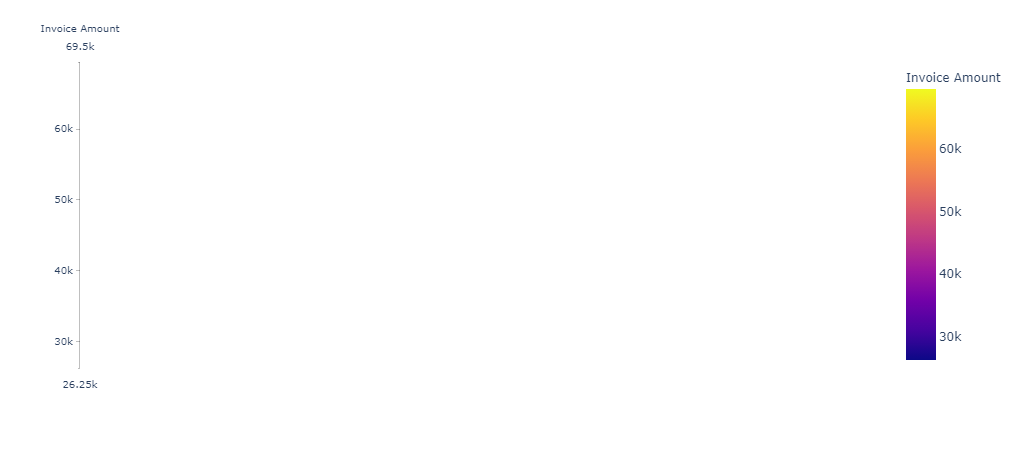

In [105]:
# Parallel Coordinates Plot
px.parallel_coordinates(top_10_highest_customer, color='Invoice Amount')

In [ ]:
# Parallel Categories Plot
#px.parallel_categories(
#    top_10_highest_customer,
#    dimensions=["customers", "invoice_amount", "subscription", "invoice"],
 #  color="customers",
  #  color_continuous_scale=px.colors.sequential.Inferno
#)


In [108]:
# import libraries
import numpy as np
import pandas as pd
import hvplot.pandas
import panel as pn
pn.extension()
# create sample data
df = pd.DataFrame({
    'date': pd.date_range(start='01-01-2020', end='31-12-2020'),
    'status': np.random.choice(['confirmed', 'bedridden', 'recovered'], 366),
    'status2': np.random.choice(['A', 'B', 'C'], 366),
    'value': np.random.rand(366) * 100
})
types = ['confirmed', 'bedridden', 'recovered']
# you need to return your plot to get the interaction
def plot_heatmap(chosen_type):
    df_selected = df[df['status']==chosen_type]
    # hvplot is handy for creating interactive plots
    heatmap = df_selected.hvplot.heatmap(x='date', y='status2', C='value')
    return heatmap
# show your interactive plot with dropdown   
pn.interact(plot_heatmap, chosen_type=types)

Column
    [0] Column
        [0] Select(name='chosen_type', options=['confirmed', ...], value='confirmed')
    [1] Row
        [0] HoloViews(HeatMap, name='interactive06541')

In [115]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

#avg_price_mean = avg_price_df

#def get_plot(customer_filter, subscription_filter):
#    df_counts = avg_price_mean.groupby(['Customers', 'Subscription']).count().reset_index()
#    df_filtered = df_counts[ (df_counts['Customers'] == customer_filter ) & ( df_counts['Subscription'] == subscription_filter) ]
#    return df_filtered.hvplot.bar(
#        x='Customers',
#        y='Invoice Amount',
#        xlabel= 'Customers',
#        ylabel='Invoice Amount',
#        width=600
#        ).opts(yformatter='%0f')
#
#customer_filter_values = avg_price_mean.reset_index()['Customers'].drop_duplicates().to_list()
#subscription_filter_values = avg_price_mean.reset_index()['Subscription'].drop_duplicates().to_list()

#pn.interact(get_plot,
#            customer_filter=customer_filter_values,
#            subscription_filter=subscription_filter_values)

In [117]:
# avg_price_mean.groupby('Subscription').count()
# avg_price_mean.groupby(['Customers', 'Subscription']).count().loc["University 1"]

#df_counts = avg_price_mean.groupby(['Customers', 'Subscription']).count().reset_index()
#df_counts[ (df_counts['Customers'] == 'University 1' ) & ( df_counts['Subscription'] == '1 Year') ]

In [118]:
# Calculate market penetration

# Identify existing and potential customers
customer_name_mapping               = tool_lookup_tables.read_customer_name_mapping()
all_potential_customers_mapping     = tool_lookup_tables.read_lookup_table(constants.LUT_POTENTIAL_CUSTOMER_NAME_FILE_PATH)

paying_customers = list(customer_name_mapping.keys())
all_potential_customers = list(all_potential_customers_mapping.keys())

customers_df = pd.DataFrame([paying_customers, all_potential_customers])
customers_df.head()

AttributeError: 'Constants' object has no attribute 'LUT_POTENTIAL_CUSTOMER_NAME_FILE_PATH'

In [111]:
# Calculate market penetration

# TODO remove duplicates
# TODO Match names
# TODO Generate pie chart

nbr_paying_customers = len(paying_customers)
nbr_potential_customers = len(all_potential_customers)
market_penetration = nbr_paying_customers / nbr_potential_customers

## Print results
print(f"The number of paying cusomters is {nbr_paying_customers}")
print(f"The number of potential cusomters is {nbr_potential_customers}")
print(f"Market penetration is {market_penetration * 100} %")

## Generate heatmap
# all_potential_customers   .hvplot.heatmap(x='time.month', y='time.day', C='temperature', 
#                   height=500, width=500, colorbar=False)


"""
The number of paying cusomters is 719
The number of potential cusomters is 3835
Market penetration is 18.748370273794002 %
"""

NameError: name 'paying_customers' is not defined

In [ ]:
# Use the `drop_duplicates` function with the `subset` parameter to 
# drop duplicates based on a selection of columns
customers_df.drop_duplicatessubset=()   

In [ ]:
faire cela d'abord {Puis} customers_df = pd.DataFrame([[paying_customers], [all_potential_customers]])customers_df.head()Puis 

In [ ]:
puis faire un dataframe en regardant les exemple de la class 

In [ ]:
# Use the `duplicated` function to determine the existance of duplicate rows: True or False
Atlas_with_address.duplicated()

In [ ]:
TODO Generate pie chart